In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import glob
import os
import logging
#for filename in glob.glob(os.path.join('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data', "*.jpg")):

100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:03<00:00, 40.17it/s]


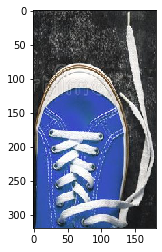

In [13]:
#train = pd.read_csv('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\trainingset.csv')
train = pd.read_csv('C:\\Users\\Justin Wang\\Desktop\\untied-master\\untied-master\\data\\trainingset.csv')
train_image = []
for i in tqdm(range(train.shape[0])):
    #img = image.load_img('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\' + train['File Name'][i], target_size=(320,180), grayscale=False)
    img = image.load_img('C:\\Users\\Justin Wang\\Desktop\\untied-master\\untied-master\\data\\' + train['File Name'][i], target_size=(320,180), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    plt.imshow(img)
X = np.array(train_image)

In [14]:
y = train['Classification'].values
y = to_categorical(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(320, 180, 3)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 119 samples, validate on 30 samples
Epoch 1/10
119/119 [==============================] - ETA: 2s - loss: 1.1302 - accuracy: 0.53 - ETA: 1s - loss: 40.2486 - accuracy: 0.484 - ETA: 0s - loss: 90.6619 - accuracy: 0.416 - 4s 31ms/step - loss: 100.1737 - accuracy: 0.3782 - val_loss: 22.6937 - val_accuracy: 0.3333
Epoch 2/10
119/119 [==============================] - ETA: 2s - loss: 10.8842 - accuracy: 0.437 - ETA: 1s - loss: 30.5740 - accuracy: 0.453 - ETA: 0s - loss: 37.5208 - accuracy: 0.468 - 4s 31ms/step - loss: 37.0567 - accuracy: 0.4790 - val_loss: 38.3376 - val_accuracy: 0.5000
Epoch 3/10
119/119 [==============================] - ETA: 2s - loss: 30.3188 - accuracy: 0.531 - ETA: 1s - loss: 29.1189 - accuracy: 0.453 - ETA: 0s - loss: 28.1412 - accuracy: 0.364 - 4s 30ms/step - loss: 31.0407 - accuracy: 0.3193 - val_loss: 25.0021 - val_accuracy: 0.1667
Epoch 4/10
119/119 [==============================] - ETA: 2s - loss: 23.6912 - accuracy: 0.187 - ETA: 1s - loss: 19.2270 - a

In [19]:
# test = pd.read_csv('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\testingset.csv')
test = pd.read_csv('C:\\Users\\Justin Wang\\Desktop\\untied-master\\untied-master\\data\\trainingset.csv')

In [20]:
test_image = []
for i in tqdm(range(test.shape[0])):
#   img = image.load_img('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\' + test['File Name'][i], target_size=(320,180), grayscale=False)
    img = image.load_img('C:\\Users\\Justin Wang\\Desktop\\untied-master\\untied-master\\data\\' + test['File Name'][i], target_size=(320,180), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
testArr = np.array(test_image)

100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:03<00:00, 42.64it/s]


In [21]:
# making predictions
prediction = model.predict_classes(testArr)

In [22]:
tmp = 0
for i in range(len(prediction)):
    if prediction[i] == 0:
        print("untied")
    elif prediction[i] == 1:
        print("tied")
    else:
        print("no laces")
        
    if prediction[i] == test["Classification"][i]:
        tmp+=1
print(tmp / len(prediction))

untied
tied
untied
untied
untied
untied
untied
no laces
no laces
untied
no laces
tied
tied
untied
no laces
no laces
no laces
no laces
tied
tied
no laces
no laces
untied
no laces
untied
untied
tied
untied
tied
untied
tied
untied
tied
tied
tied
tied
untied
tied
tied
tied
tied
tied
tied
tied
tied
tied
untied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
untied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
tied
untied
untied
untied
untied
untied
untied
tied
tied
untied
untied
untied
untied
untied
untied
untied
untied
untied
untied
tied
untied
tied
untied
untied
untied
tied
tied
untied
untied
tied
untied
untied
untied
untied
tied
untied
untied
untied
untied
untied
untied
tied
tied
untied
untied
untied
untied
0.7785234899328859
